# Ranking offensive output of NBA guards
## Offensive Data
### Members:
Tejus Janakiraman (tejusj)
<br>
Zubin Joseph (zoobi)
<br>
Pranav SImha (nav01)
<br>
Davin Stephens (davincs)
<br>
Logan Ruscheinski (lruscheinski)

# Potential Questions: 
What is the affect of the change to hand-checking in the NBA? 
<br>
As the league has changed, how has that affected how different positions play?
<br>
How does scoring compare between 2004 (right after the hand checking rule was changed) to the most recent season?
<br>

# Context: 
Our main data analysis relies on k-means clustering which partitions data points into clusters based on proximity to the nearest mean of a cluster. Doing this allows us to compare a dense data set with many data points with its own points. These clusters are graphed and show us each player and their cluster. The distance between each point also shows us similarity between players. Two players can belong to a different cluster but have similarities in other aspects.

By clustering the data for both seasons we can see how players from different positions compare. In 2004 Centers were clustered together and shared similar groups and play styles but in the 21’ season we can see a shift in where positions are grouped. More players are becoming more flexible and rigid positions are no longer seen as much. A Center will not only rebound but attempt 3 point shots and other deep shots. This trend has been seen throughout several seasons as more Teams are looking for players who can do everything rather than just their positional role.
<br>



# Potential References 

One dataset used comes from an online database of NBA player’s stats from 1950-2017, for the purpose of this report we will be using the data from 2004-2017 as in 2004 the hand-checking rule was implemented, this rule made it illegal to place and hold another player's hand. This rule ushered in what many dub the modern era of basketball as the sport was no longer dominated by physical play but more finesse and skilled shots.

https://www.basketball-reference.com/
<br>
https://stathead.com/basketball/
<br>
https://www.kaggle.com/datasets/drgilermo/nba-players-stats?select=Seasons_Stats.csv

A dataset that we will use to gain insight into the offensive output of each player is the stats per 36 minutes of play from this current season. With the stats being per 36 minutes, the playstyles and realtime output can be compared accurately.

In [1]:
import pandas as pd
per36 = pd.read_csv('Per36.csv')
# remove all non-offensive stats
per36 = per36.drop(columns=['Rk', 'Age', 'Tm', 'G', 'GS', 'DRB', 'TRB', 'STL', 'BLK', 'PF'])
per36 = per36.dropna() # remove non-relevant players
per36

,Player,Pos,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,AST,TOV,PTS
0,Precious Achiuwa,C,1646,5.5,12.6,0.439,1.1,3.1,0.348,4.4,9.5,0.469,1.6,2.8,0.587,3.1,1.7,1.7,13.7
1,Steven Adams,C,1953,3.8,7.0,0.545,0.0,0.0,0.000,3.8,7.0,0.546,2.0,3.6,0.548,6.3,4.6,2.1,9.6
2,Bam Adebayo,C,1792,8.0,14.4,0.557,0.0,0.1,0.000,8.0,14.2,0.561,5.0,6.6,0.752,2.7,3.7,3.0,21.0
3,Santi Aldama,PF,319,4.9,12.3,0.394,0.5,4.6,0.098,4.4,7.7,0.574,1.6,2.7,0.583,2.8,1.8,1.2,11.7
4,LaMarcus Aldridge,C,1050,8.6,15.7,0.550,0.5,1.6,0.304,8.2,14.1,0.578,3.1,3.5,0.873,2.5,1.4,1.5,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,Moses Wright,PF,6,6.0,24.0,0.250,0.0,6.0,0.000,6.0,18.0,0.333,6.0,6.0,1.000,6.0,6.0,0.0,18.0
597,Thaddeus Young,PF,770,6.1,11.7,0.522,0.7,1.9,0.375,5.4,9.9,0.550,0.9,2.1,0.444,3.6,4.4,2.3,13.9
598,Trae Young,PG,2582,9.6,20.9,0.459,3.2,8.3,0.382,6.5,12.7,0.509,6.8,7.5,0.902,0.7,10.0,4.1,29.2
599,Omer Yurtseven,C,671,6.8,12.5,0.545,0.1,0.4,0.125,6.8,12.1,0.560,2.0,3.2,0.627,4.3,2.6,2.1,15.7


From the above data, the most important stat for predicting offensive output is points per 36 minutes, so we sort by that below and see if there are any major shifts from players. The MP, or minutes played, column is kept in order to check for outlier players who do not get as much playing time. Originally, this stat was not kept in our table and resulted in the player with only 8 minutes played this season having the highest offensive output, shown below.

In [2]:
per36 = per36.sort_values('PTS', ascending=False)
per36

,Player,Pos,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,AST,TOV,PTS
406,Malik Newman,PG,8,13.5,22.5,0.600,0.0,4.5,0.000,13.5,18.0,0.750,9.0,9.0,1.000,0.0,4.5,4.5,36.0
11,Giannis Antetokounmpo,PF,2139,11.3,20.3,0.554,1.2,4.0,0.298,10.1,16.4,0.616,9.0,12.5,0.720,2.2,6.3,3.6,32.7
161,Joel Embiid,C,2222,10.4,21.0,0.496,1.5,4.0,0.371,8.9,17.0,0.525,10.3,12.6,0.816,2.3,4.5,3.3,32.5
145,Sekou Doumbouya,PF,16,11.3,18.0,0.625,2.3,4.5,0.500,9.0,13.5,0.667,6.8,9.0,0.750,4.5,0.0,4.5,31.5
34,Paris Bass,SF,7,10.3,30.9,0.333,0.0,10.3,0.000,10.3,20.6,0.500,10.3,10.3,1.000,10.3,0.0,10.3,30.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,Nerlens Noel,C,562,2.0,3.8,0.533,0.0,0.2,0.000,2.0,3.7,0.561,1.3,1.9,0.700,3.1,1.5,1.3,5.4
390,Jaylen Morris,SG,16,0.0,13.5,0.000,0.0,4.5,0.000,0.0,9.0,0.000,4.5,9.0,0.500,0.0,4.5,2.3,4.5
427,Miye Oni,SG,44,1.6,7.4,0.222,0.8,6.5,0.125,0.8,0.8,1.000,0.0,0.8,0.000,0.8,4.1,0.8,4.1
184,Marcus Garrett,SG,128,1.4,5.9,0.238,0.3,1.1,0.250,1.1,4.8,0.235,0.6,1.4,0.400,2.5,2.0,0.6,3.7


Thus, we will limit the dataset to players having played at least 5 minutes a game for 50 games, so more realistic output can be obtained. An interesting note for this data is that some players who have less playing time have higher field goal percentages than players labeled as 3 point specialist simply due to a lack of numerics.

In [3]:
per36 = per36.query('MP > 250')
per36 = per36.drop(columns = ['MP']) # remove MP as it does not describe playstyle
per36

,Player,Pos,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,AST,TOV,PTS
11,Giannis Antetokounmpo,PF,11.3,20.3,0.554,1.2,4.0,0.298,10.1,16.4,0.616,9.0,12.5,0.720,2.2,6.3,3.6,32.7
161,Joel Embiid,C,10.4,21.0,0.496,1.5,4.0,0.371,8.9,17.0,0.525,10.3,12.6,0.816,2.3,4.5,3.3,32.5
388,Ja Morant,PG,11.1,22.5,0.493,1.7,4.9,0.340,9.4,17.6,0.535,6.0,7.9,0.762,1.5,7.3,3.7,29.8
272,LeBron James,SF,11.1,21.1,0.524,2.8,7.7,0.359,8.3,13.4,0.620,4.4,5.8,0.756,1.1,6.0,3.4,29.3
598,Trae Young,PG,9.6,20.9,0.459,3.2,8.3,0.382,6.5,12.7,0.509,6.8,7.5,0.902,0.7,10.0,4.1,29.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,Tony Snell,SG,2.8,7.2,0.394,1.9,5.5,0.353,0.9,1.7,0.528,0.1,0.1,1.000,0.7,1.2,0.8,7.7
17,Trevor Ariza,SF,2.6,7.7,0.333,1.6,5.8,0.270,1.0,1.9,0.520,0.8,1.4,0.556,0.8,2.1,0.9,7.5
261,Andre Iguodala,SF,2.7,7.1,0.387,1.0,4.4,0.232,1.7,2.7,0.643,0.9,1.1,0.778,1.3,6.8,1.7,7.4
101,Chris Chiozza,PG,2.3,7.8,0.296,1.6,5.1,0.321,0.7,2.7,0.250,0.2,0.3,0.667,0.9,6.3,3.1,6.5


In [4]:
#TrueShootingPercentage = PTS/(2 * (FGA + .44*FTA))
per36['TSP'] = per36['PTS']/(2 * (per36['FGA'] + .44*per36['FTA']))
per36 = per36.sort_values('TSP', ascending=False)
per36

,Player,Pos,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,AST,TOV,PTS,TSP
586,Robert Williams,C,5.4,7.3,0.736,0.0,0.0,0.000,5.4,7.3,0.738,1.3,1.8,0.722,4.7,2.4,1.3,12.1,0.747652
194,Rudy Gobert,C,6.2,8.7,0.713,0.0,0.1,0.000,6.2,8.6,0.719,5.0,7.3,0.690,4.1,1.2,2.0,17.4,0.730356
455,Dwight Powell,C,5.3,8.0,0.662,0.3,0.8,0.351,5.0,7.2,0.695,3.3,4.1,0.800,3.5,1.9,1.2,14.2,0.724194
180,Daniel Gafford,C,7.1,10.3,0.696,0.0,0.0,0.000,7.1,10.2,0.698,2.6,3.7,0.711,3.9,1.7,1.7,16.9,0.708417
7,Jarrett Allen,C,7.3,10.8,0.677,0.0,0.2,0.100,7.3,10.6,0.688,3.3,4.6,0.708,3.8,1.8,1.9,18.0,0.701809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,Michael Porter Jr.,SF,5.0,14.0,0.359,1.4,6.5,0.208,3.7,7.5,0.491,0.7,1.2,0.556,1.2,2.3,1.6,12.1,0.416437
101,Chris Chiozza,PG,2.3,7.8,0.296,1.6,5.1,0.321,0.7,2.7,0.250,0.2,0.3,0.667,0.9,6.3,3.1,6.5,0.409733
475,Justin Robinson,PG,3.3,11.0,0.301,2.1,7.2,0.295,1.2,3.8,0.313,0.5,0.9,0.500,0.5,3.8,2.0,9.2,0.403650
438,Elfrid Payton,PG,4.4,11.6,0.382,0.3,1.2,0.222,4.2,10.4,0.400,0.8,2.1,0.375,1.4,6.5,3.0,9.9,0.395241


<AxesSubplot:xlabel='k'>

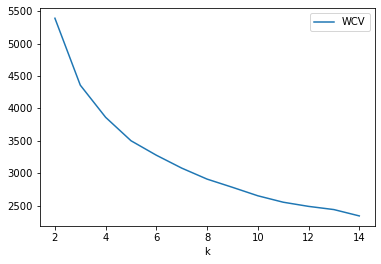

In [5]:
# normalize data so that playstyle can be compared
per36.index = per36.Player
norm = per36.iloc[:, 2:]
norm = (norm - norm.mean()) / norm.std()

import sklearn.cluster as clustering
# compute an elbow plot with between 2-15 clusters
data = []
for i in range (2, 15):
    km = clustering.KMeans(n_clusters=i)
    labels = km.fit_predict(norm)
    data.append((i, km.inertia_))
quality = pd.DataFrame(data, columns=['k', 'WCV'])
quality.plot.line(x='k',y='WCV')

In [6]:
# picked 8 for the k means clustering
km = clustering.KMeans(n_init=1, max_iter=10, n_clusters=8, init=norm.head(8))
labels = km.fit_predict(norm)
# create a table to see which players are in the same cluster
norm['Player'] = per36['Player']
norm['Cluster'] = labels
playerCluster = norm[['Player', 'Cluster']]
playerCluster = playerCluster.sort_values('Cluster')
playerCluster.reset_index(drop=True, inplace=True)
playerCluster

,Player,Cluster
0,Steven Adams,0
1,Paul Reed,0
2,Khem Birch,0
3,Derrick Favors,0
4,Thanasis Antetokounmpo,0
...,...,...
415,Brook Lopez,7
416,Jordan Clarkson,7
417,Nikola Vučević,7
418,Cade Cunningham,7


In [7]:
from sklearn.decomposition import PCA
# renormalize data for PCA
norm2 = per36.iloc[:,2:]
norm2 = (norm2 - norm2.mean()) / norm2.std()
# run PCA with player data
pca = PCA(svd_solver='full')
tablePCA = pca.fit_transform(norm2)
tablePCA = pd.DataFrame(tablePCA, index=per36.index)
# create table with players x and y values
playerLoc = tablePCA
playerLoc['Player'] = per36['Player']
playerLoc['X'] = tablePCA.iloc[:,[0]]
playerLoc['Y'] = tablePCA.iloc[:,[1]]
playerLoc = playerLoc[['Player', 'X', 'Y']]
playerLoc.reset_index(drop=True, inplace=True)
playerLoc

,Player,X,Y
0,Robert Williams,1.105890,7.069637
1,Rudy Gobert,3.977420,6.156642
2,Dwight Powell,1.457227,4.672254
3,Daniel Gafford,3.124799,5.841371
4,Jarrett Allen,3.645772,5.243283
...,...,...,...
415,Michael Porter Jr.,-1.989234,-0.164382
416,Chris Chiozza,-4.721649,-1.720398
417,Justin Robinson,-4.230226,-1.693471
418,Elfrid Payton,-1.021728,1.059374


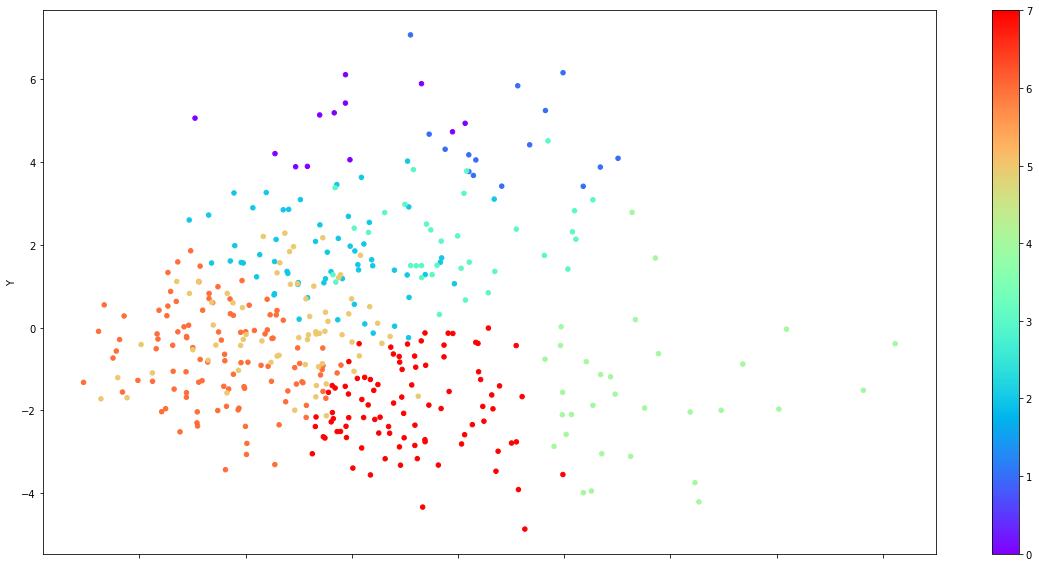

In [8]:
# create scatter plot using player values from PCA
ax = playerLoc.plot.scatter(x='X', y='Y', c=km.labels_, cmap='rainbow', figsize=(20,10))

In [9]:
per36.reset_index(drop=True, inplace=True) # in order for merge on Player to work
# merge stats with cluster
clusterstats = pd.merge(playerCluster, per36, how='left', on='Player')
# create stats tables for each cluster
cluster0stats2021 = clusterstats.query('Cluster == 0')
cluster1stats2021 = clusterstats.query('Cluster == 1')
cluster2stats2021 = clusterstats.query('Cluster == 2')
cluster3stats2021 = clusterstats.query('Cluster == 3')
cluster4stats2021 = clusterstats.query('Cluster == 4')
cluster5stats2021 = clusterstats.query('Cluster == 5')
cluster6stats2021 = clusterstats.query('Cluster == 6')
cluster7stats2021 = clusterstats.query('Cluster == 7')

<AxesSubplot:ylabel='Pos'>

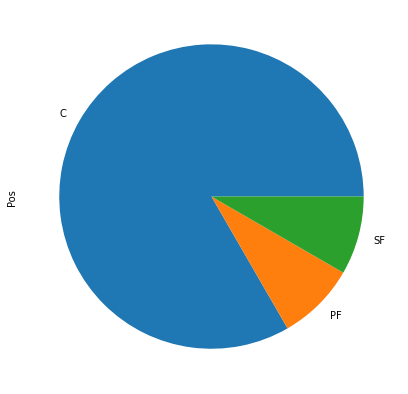

In [10]:
cluster0stats2021.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

<AxesSubplot:ylabel='Pos'>

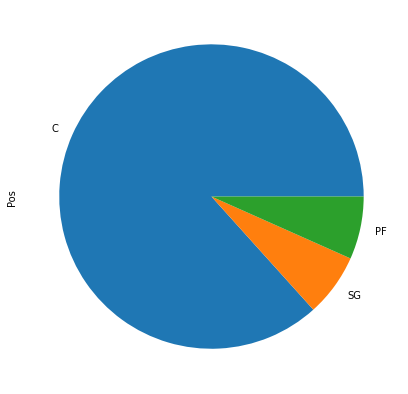

In [11]:
cluster1stats2021.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

<AxesSubplot:ylabel='Pos'>

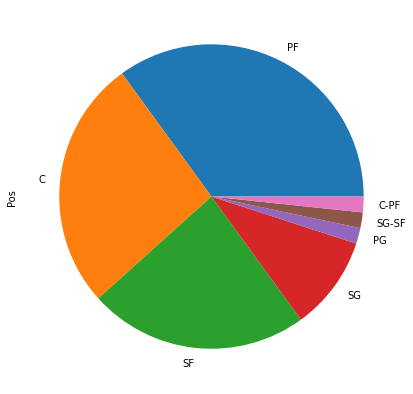

In [12]:
cluster2stats2021.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

<AxesSubplot:ylabel='Pos'>

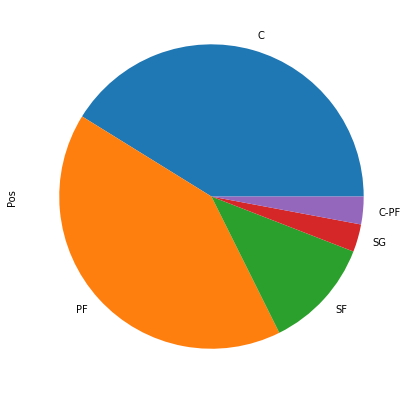

In [13]:
cluster3stats2021.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

<AxesSubplot:ylabel='Pos'>

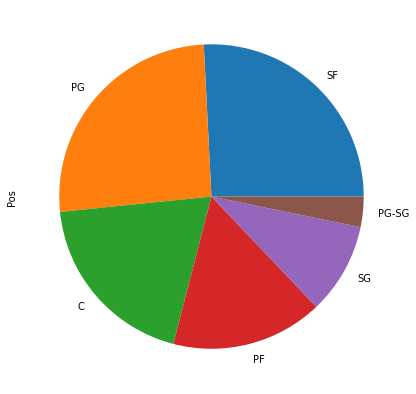

In [14]:
cluster4stats2021.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

<AxesSubplot:ylabel='Pos'>

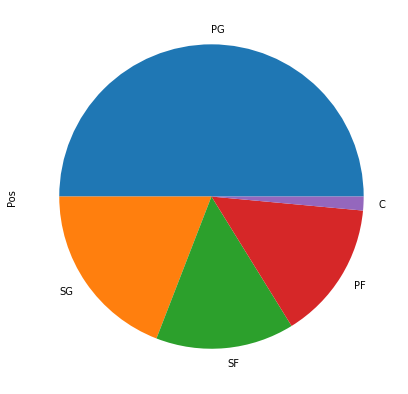

In [15]:
cluster5stats2021.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

<AxesSubplot:ylabel='Pos'>

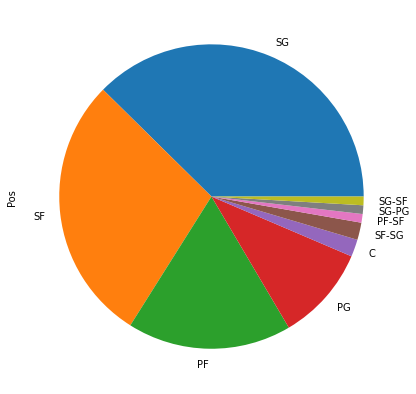

In [16]:
cluster6stats2021.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

<AxesSubplot:ylabel='Pos'>

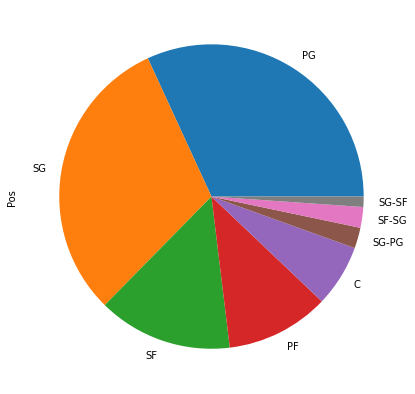

In [17]:
cluster7stats2021.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

In [18]:
corr = per36.corr()
corr.style.background_gradient(cmap='coolwarm')

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,AST,TOV,PTS,TSP
FG,1.000000,0.885885,0.353030,0.138145,0.113179,0.093663,0.843480,0.849930,0.191239,0.697713,0.681940,0.149160,0.056783,0.283039,0.546322,0.963991,0.317421
FGA,0.885885,1.000000,-0.103765,0.420642,0.451271,0.149815,0.585816,0.700852,-0.180524,0.609827,0.554368,0.272418,-0.241904,0.374974,0.554273,0.915309,-0.060771
FG%,0.353030,-0.103765,1.000000,-0.533546,-0.647713,-0.134768,0.613603,0.407323,0.786072,0.254396,0.331209,-0.228924,0.613686,-0.152153,0.055248,0.218932,0.824197
3P,0.138145,0.420642,-0.533546,1.000000,0.966446,0.500758,-0.414820,-0.326049,-0.356056,-0.061734,-0.172997,0.457431,-0.638155,0.043350,-0.059599,0.295835,-0.073790
3PA,0.113179,0.451271,-0.647713,0.966446,1.000000,0.389742,-0.420119,-0.320117,-0.387122,-0.054759,-0.164154,0.434032,-0.665951,0.070471,-0.026054,0.272717,-0.236338
3P%,0.093663,0.149815,-0.134768,0.500758,0.389742,1.000000,-0.185315,-0.152394,-0.137030,-0.044582,-0.109898,0.272455,-0.332241,-0.025399,-0.085768,0.161234,0.182674
2P,0.843480,0.585816,0.613603,-0.414820,-0.420119,-0.185315,1.000000,0.957680,0.369488,0.672868,0.718434,-0.110442,0.397638,0.236217,0.533656,0.724708,0.331239
2PA,0.849930,0.700852,0.407323,-0.326049,-0.320117,-0.152394,0.957680,1.000000,0.117803,0.691263,0.719625,-0.057434,0.275192,0.342613,0.609702,0.753649,0.124249
2P%,0.191239,-0.180524,0.786072,-0.356056,-0.387122,-0.137030,0.369488,0.117803,1.000000,0.104302,0.158754,-0.166490,0.411693,-0.240176,-0.104072,0.094251,0.720978
FT,0.697713,0.609827,0.254396,-0.061734,-0.054759,-0.044582,0.672868,0.691263,0.104302,1.000000,0.974567,0.219438,0.112869,0.290598,0.555634,0.791999,0.298554


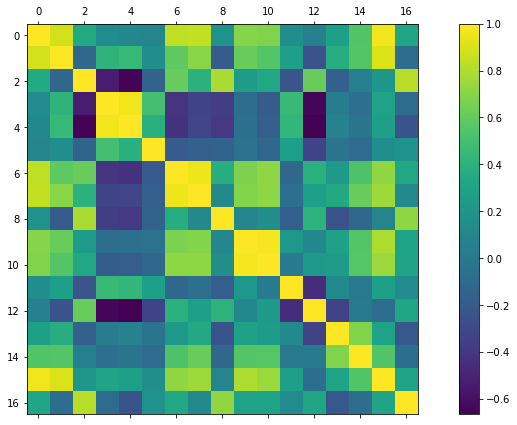

In [19]:
import matplotlib.pyplot as plt

corrM = plt.figure(figsize=(15,7))
plt.matshow(per36.corr(), fignum=corrM.number)
cb = plt.colorbar()
plt.show()

In [20]:
per36_2004 = pd.read_csv('per36_2004_clean.csv')
per36_2004 = per36_2004.iloc[1:]
# remove all non-offensive stats
per36_2004 = per36_2004.drop(columns=['Rk', 'Age', 'Tm', 'G', 'GS', 'DRB', 'TRB', 'STL', 'BLK', 'PF'])
per36_2004 = per36_2004.dropna() # remove non-relevant players
per36_2004

,Player,Pos,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,2P%,FT,FTA,FT%,ORB,AST,TOV,PTS,ORtg,DRtg
1,Cory Alexander\alexaco01,SG,201,4.1,12.7,0.327,2.1,4.9,0.421,2.1,...,0.267,2.3,3.1,0.750,2.1,9.6,4.9,12.7,91.0,108.0
3,Ray Allen*\allenra02,SG,3064,11.4,26.6,0.428,3.7,9.9,0.376,7.7,...,0.459,6.7,7.6,0.883,1.4,5.2,3.0,33.3,117.0,112.0
4,Tony Allen\allento01,SG,1262,7.5,15.8,0.475,0.5,1.3,0.387,7.0,...,0.483,4.6,6.2,0.737,3.5,2.6,3.1,20.1,106.0,104.0
5,Rafer Alston\alstora01,PG,2717,7.7,18.6,0.414,2.6,7.4,0.357,5.0,...,0.451,3.6,4.9,0.740,0.8,9.8,3.2,21.7,108.0,109.0
6,Chris Andersen\anderch01,C,1430,7.3,13.7,0.534,0.0,0.1,0.000,7.3,...,0.538,5.0,7.3,0.689,5.3,2.7,2.5,19.7,116.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Loren Woods\woodslo01,C,712,5.2,11.9,0.433,0.0,0.1,0.000,5.2,...,0.436,2.5,4.3,0.576,5.9,1.2,2.7,12.8,98.0,106.0
460,Metta World Peace\artesro01,SF,291,11.2,22.5,0.496,1.3,3.2,0.412,9.8,...,0.510,8.9,9.6,0.922,1.5,4.2,3.2,32.5,118.0,103.0
461,Dorell Wright\wrighdo01,SF,27,5.9,21.5,0.273,0.0,7.8,0.000,5.9,...,0.429,2.0,2.0,1.000,0.0,5.9,5.9,13.7,62.0,94.0
462,Lorenzen Wright\wrighlo02,C,2287,7.6,16.2,0.469,0.0,0.1,0.000,7.6,...,0.471,3.1,4.7,0.662,4.2,2.1,2.4,18.3,103.0,101.0


In [21]:
#TrueShootingPercentage = PTS/(2 * (FGA + .44*FTA))
per36_2004['TSP'] = per36_2004['PTS']/(2 * (per36_2004['FGA'] + .44*per36_2004['FTA']))
per36_2004 = per36_2004.sort_values('TSP', ascending=False)
per36_2004

,Player,Pos,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT,FTA,FT%,ORB,AST,TOV,PTS,ORtg,DRtg,TSP
187,Fred Hoiberg\hoibefr01,SG,1272,5.9,12.0,0.489,3.0,6.1,0.483,2.9,...,3.8,4.3,0.873,1.4,3.6,0.8,18.5,138.0,106.0,0.665851
61,Greg Buckner\buckngr01,SG,1522,5.4,10.2,0.528,1.7,4.1,0.405,3.7,...,2.1,2.7,0.778,2.2,4.5,1.7,14.6,126.0,105.0,0.641026
229,Damon Jones\jonesda01,PG,2576,6.8,14.9,0.456,4.6,10.7,0.432,2.2,...,1.4,1.8,0.791,0.3,7.2,2.0,19.6,124.0,107.0,0.624522
248,Christian Laettner\laettch01,PF,739,7.7,13.2,0.582,0.1,0.5,0.143,7.6,...,3.2,4.2,0.763,2.6,2.9,2.1,18.6,120.0,102.0,0.618022
394,Amar'e Stoudemire\stoudam01,C,2889,12.9,23.1,0.559,0.1,0.3,0.188,12.9,...,10.1,13.8,0.733,3.8,2.3,3.3,36.0,121.0,105.0,0.617030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Mark Jones\jonesma03,SF,116,3.9,13.5,0.290,0.0,1.7,0.000,3.9,...,2.2,4.4,0.500,2.6,2.6,1.3,10.0,81.0,109.0,0.323918
461,Dorell Wright\wrighdo01,SF,27,5.9,21.5,0.273,0.0,7.8,0.000,5.9,...,2.0,2.0,1.000,0.0,5.9,5.9,13.7,62.0,94.0,0.306077
84,Derrick Coleman\colemde01,C,50,3.3,15.4,0.214,0.0,2.2,0.000,3.3,...,3.3,3.3,1.000,3.3,0.0,2.2,9.9,70.0,102.0,0.293734
396,Rod Strickland\stricro02,PG,196,2.5,11.9,0.209,0.3,0.6,0.500,2.2,...,2.5,2.8,0.900,0.8,10.8,4.4,7.7,75.0,104.0,0.293177


<AxesSubplot:xlabel='k'>

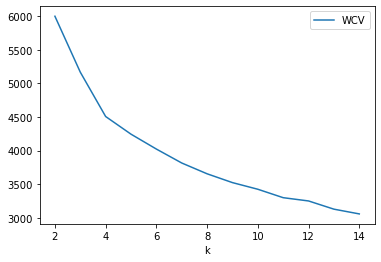

In [22]:
# normalize data so that playstyle can be compared
per36_2004.index = per36_2004.Player
norm = per36_2004.iloc[:, 2:]
norm = (norm - norm.mean()) / norm.std()

# compute an elbow plot with between 2-15 clusters
data = []
for i in range (2, 15):
    km = clustering.KMeans(n_clusters=i)
    labels = km.fit_predict(norm)
    data.append((i, km.inertia_))
quality = pd.DataFrame(data, columns=['k', 'WCV'])
quality.plot.line(x='k',y='WCV')

In [23]:
# picked 8 for the k means clustering
km = clustering.KMeans(n_init=1, max_iter=10, n_clusters=4, init=norm.head(4))
labels = km.fit_predict(norm)
# create a table to see which players are in the same cluster
norm['Player'] = per36_2004['Player']
norm['Cluster'] = labels
playerCluster = norm[['Player', 'Cluster']]
playerCluster = playerCluster.sort_values('Cluster')
playerCluster.reset_index(drop=True, inplace=True)
playerCluster

,Player,Cluster
0,Fred Hoiberg\hoibefr01,0
1,Eddie Gill\gilled01,0
2,Antonio Burks\burksan01,0
3,Dahntay Jones\jonesda02,0
4,Vladimir Radmanović\radmavl01,0
...,...,...
371,Marcus Camby\cambyma01,3
372,Antonio McDyess\mcdyean01,3
373,Tony Allen\allento01,3
374,Ruben Patterson\patteru01,3


In [24]:
from sklearn.decomposition import PCA
# renormalize data for PCA
norm2 = per36_2004.iloc[:,2:]
norm2 = (norm2 - norm2.mean()) / norm2.std()
# run PCA with player data
pca = PCA(svd_solver='full')
tablePCA = pca.fit_transform(norm2)
tablePCA = pd.DataFrame(tablePCA, index=per36_2004.index)
# create table with players x and y values
playerLoc = tablePCA
playerLoc['Player'] = per36_2004['Player']
playerLoc['X'] = tablePCA.iloc[:,[0]]
playerLoc['Y'] = tablePCA.iloc[:,[1]]
playerLoc = playerLoc[['Player', 'X', 'Y']]
playerLoc.reset_index(drop=True, inplace=True)
playerLoc

,Player,X,Y
0,Fred Hoiberg\hoibefr01,-0.280123,-1.887620
1,Greg Buckner\buckngr01,-0.711232,0.044453
2,Damon Jones\jonesda01,-0.850383,-3.886377
3,Christian Laettner\laettch01,1.298123,2.522210
4,Amar'e Stoudemire\stoudam01,7.941652,2.087438
...,...,...,...
371,Mark Jones\jonesma03,-4.881151,1.830642
372,Dorell Wright\wrighdo01,-2.978558,-0.489790
373,Derrick Coleman\colemde01,-5.210606,0.890369
374,Rod Strickland\stricro02,-5.946617,-1.623217


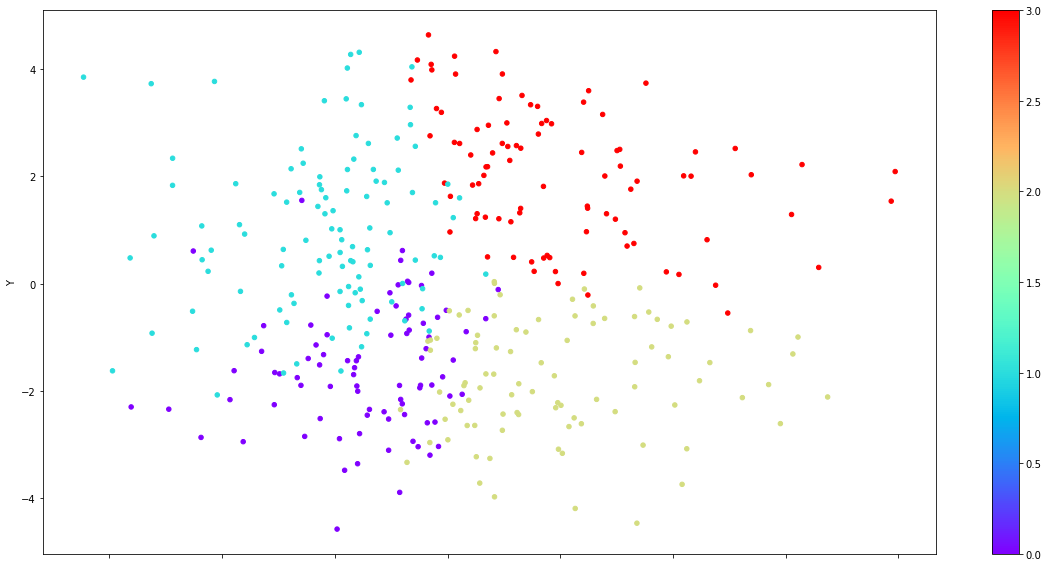

In [25]:
# create scatter plot using player values from PCA
ax = playerLoc.plot.scatter(x='X', y='Y', c=km.labels_, cmap='rainbow', figsize=(20,10))

In [26]:
per36_2004.reset_index(drop=True, inplace=True) # in order for merge on Player to work
# merge stats with cluster
clusterstats = pd.merge(playerCluster, per36_2004, how='left', on='Player')
# create stats tables for each cluster
cluster0stats2004 = clusterstats.query('Cluster == 0')
cluster1stats2004 = clusterstats.query('Cluster == 1')
cluster2stats2004 = clusterstats.query('Cluster == 2')
cluster3stats2004 = clusterstats.query('Cluster == 3')

<AxesSubplot:ylabel='Pos'>

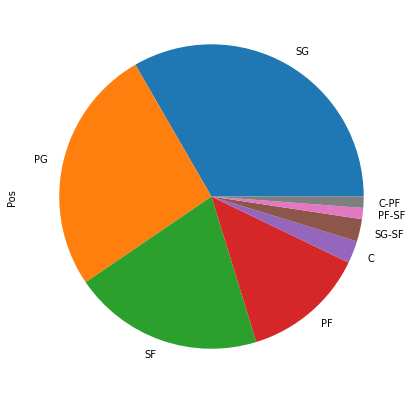

In [27]:
cluster0stats2004.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

<AxesSubplot:ylabel='Pos'>

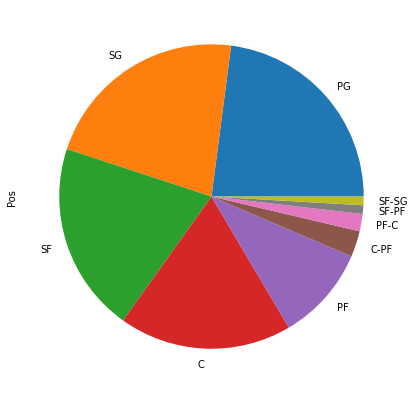

In [28]:
cluster1stats2004.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

<AxesSubplot:ylabel='Pos'>

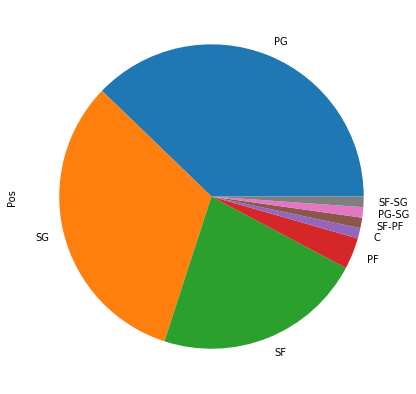

In [29]:
cluster2stats2004.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

<AxesSubplot:ylabel='Pos'>

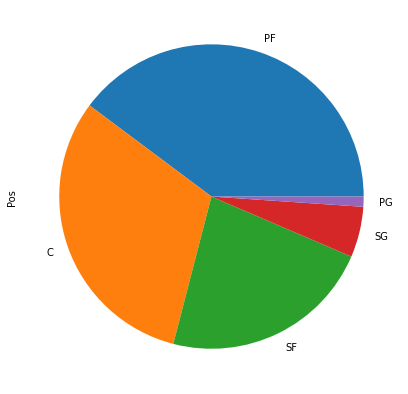

In [30]:
cluster3stats2004.Pos.value_counts().plot(kind = "pie", figsize=(15,7))

# Conclusion: 

Players like Giannis and Jokic who are Front court players are acting as a sort of hybrid between a point guard and center, this pseudo position also dubbed the “point-center” has changed how Basketball in the NBA is played. Since ball movement can be facilitated by multiple positions we see a faster and more aggressive style of basketball. Looking at the clusters we can see that Centers, Power Forwards, and Small Forwards are being grouped similarly to Point Guards. (source: https://sportsanalytics.berkeley.edu/articles/point-centers.html).

The findings from these clusters point towards a conclusion that modern NBA play has shifted from a structured positional play to one of an aggressive scoring play style. Players are developing their 3-point shooting as players like Ben Simmons who have a distinct lack of 3-point ability are much less lethal than players like Steph Curry and Jokic who can reliably make 3-pointers. A more developed look at these statistics could take data from a range of years to see exactly where this shift from positional play to our modern open style exactly occurred.

### Contributions: 
Pranav Simha: Data analysis explanations, background information gathering
<br>
Logan Ruscheinski: Data analysis/cleaning/visualization creation
<br>
Tejus Janakiraman: Data gathering and analysis, report supervision
<br>
Zubin Joseph: Data cleaning/reporting
<br>
Davin Stephens: Data analysis/cleaning/visualization creation
